# Program 1: Task 1: Understanding Customer behavior

#  Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
    }
</style>

# Read Dataset Using Pandas

In [3]:
demo_data = pd.read_csv("Demographic_Data.csv")

demo_data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


# Data Preprocessing

During this Phase, check

    - Volume of data
    - Data types of all columns
    - Missing values/nulls
    - Descriptive/ Summary statistics on numerical columns
    - Identify Categorical columns
    - Find duplicate data
    

In [5]:
# Check the first 10 rows of the data frame

demo_data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


In [7]:
# Check the Volume of data

demo_data.shape

(80000, 5)

In [6]:
# Check the columns

demo_data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [7]:
# Check the data types of all columns

demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [8]:
# Check whether there are any missing values or nulls

demo_data.isnull().any()

in-store    False
age         False
items       False
amount      False
region      False
dtype: bool

In [9]:
# Check for any duplicate values

demo_data.drop_duplicates().any()


in-store    True
age         True
items       True
amount      True
region      True
dtype: bool

In [10]:
# Check descriptive statistics for all numerical columns

demo_data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [11]:
# Looking at the data set above, can infer in-store, region are categorical columns
# Check the Unique value and counts 

demo_data['in-store'].value_counts()

1    40000
0    40000
Name: in-store, dtype: int64

In [12]:
demo_data['region'].value_counts()

4    26000
2    20000
3    18000
1    16000
Name: region, dtype: int64

# Exploratory data Analysis Using Visualization

Let's Visualize the data using Histograms, Scatter plots, Box plots etc to 

    -Identify patterns 
    -Outliers
    -Relationships between variables
    -Data distribution etc.

### Univariate Analysis: Check the data distribution of single variable

Text(0.5, 1, 'Number of Transactions by Mode- Online/Store')

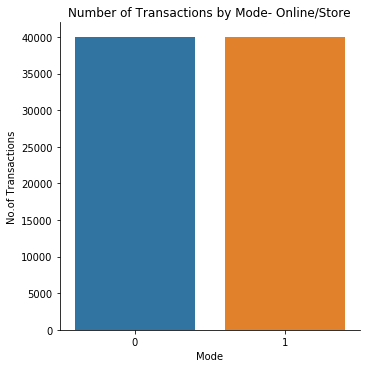

In [13]:
# Check the data distribution of Mode of transaction

TransactionsByRegion = sns.catplot('in-store', data=demo_data, kind='count', aspect=1)
                                 

# Add labels to x,y axis and title
TransactionsByRegion.set_xlabels('Mode')
TransactionsByRegion.set_ylabels('No.of Transactions')
plt.title('Number of Transactions by Mode- Online/Store')


Text(0.5, 1.0, 'Customers Age distribution')

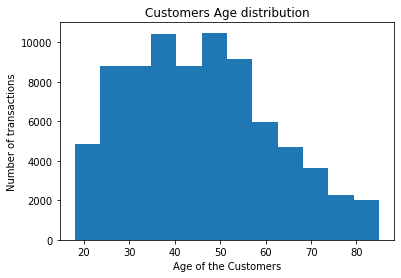

In [14]:
# Check the data distribution of Age

plt.hist(demo_data['age'], bins=12)

# Add label to x,y axis and title
plt.xlabel('Age of the Customers')
plt.ylabel('Number of transactions')
plt.title('Customers Age distribution')

#### Observation: Most of the Customers are in the age group 30-50

Text(0.5, 1.0, ' Distribution of Items per Transaction')

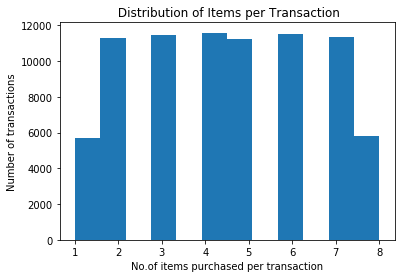

In [15]:
# Check the data distribution of items

plt.hist(demo_data['items'], bins=12)

# Add label to x,y axis and title
plt.xlabel('No.of items purchased per transaction')
plt.ylabel('Number of transactions')
plt.title(' Distribution of Items per Transaction')

#### Observation: Most of the people buy 3-6 items per transaction

Text(0.5, 1.0, ' Distribution of Amount spent per Transaction')

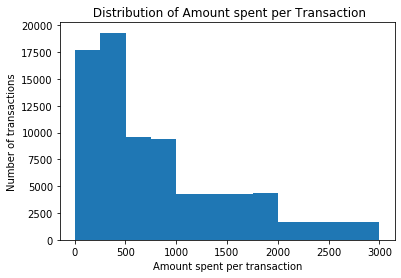

In [16]:
# Check the data distribution of amount

plt.hist(demo_data['amount'], bins=12)

# Add label to x,y axis and title
plt.xlabel('Amount spent per transaction')
plt.ylabel('Number of transactions')
plt.title(' Distribution of Amount spent per Transaction')

#### Observation: Most of the transaction amount are around 250-500$

Text(0.5, 1, 'Number of Transactions by Region')

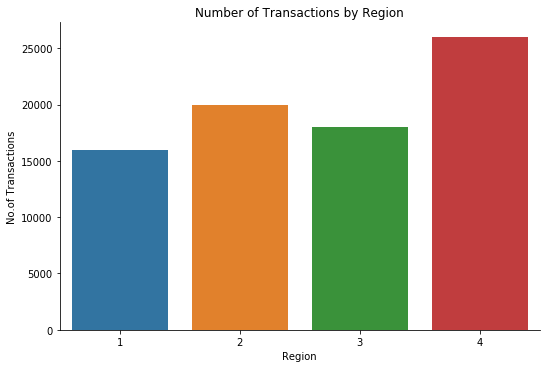

In [8]:
# Check the data distribution of Region

TransactionsByRegion = sns.catplot('region', data=demo_data, kind='count', aspect=1.5)

# Add labels to x,y axis and title
TransactionsByRegion.set_xlabels('Region')
TransactionsByRegion.set_ylabels('No.of Transactions')
plt.title('Number of Transactions by Region')

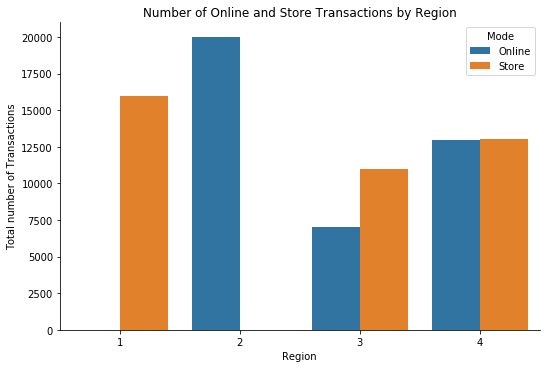

In [9]:
TransactionsByRegionMode = sns.catplot('region', data=demo_data, hue ='in-store', kind ='count', aspect=1.5, legend=False)

# Add labels to x,y axis, legend and table
TransactionsByRegionMode.set_xlabels('Region')
TransactionsByRegionMode.set_ylabels('Total number of Transactions')
plt.title('Number of Online and Store Transactions by Region')
plt.legend(title ='Mode', loc ='upper right', labels =['Online', 'Store'])

#### Observation:
    
    Region 1 has no online transactions
    Region 2 has no store transactions
    In Region 3, there are more transactions in store than online
    In Region 4, number of Online and Store transactions are same

### Bivariate Analysis: Check the relationship between variables using Scatter plot

Text(0.5, 1.0, 'Relationship between Age and the amount spent')

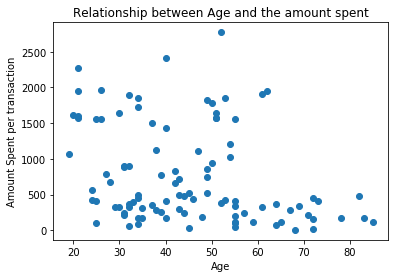

In [19]:
# Let's check the relationship between age and amount.
# Independent variable- age in x axis
# Dependent Variable - amount in Y axis

# Let's consider 100 random samples.
data_sample = demo_data.sample(100)

# Set x and y axis
x = data_sample['age']
y = data_sample['amount']

# Scatter plot
plt.scatter(x,y, marker='o')
plt.xlabel('Age')
plt.ylabel('Amount Spent per transaction')
plt.title('Relationship between Age and the amount spent')

#### Observation:From the above Scatter plot, we can infer that there is no relationship between age and the amount spent per transaction.

Text(0.5, 1.0, 'Relationship between the no.of items purchased and the amount spent')

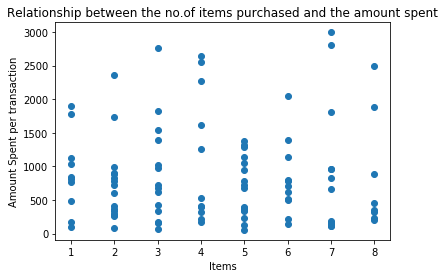

In [20]:
# Let's check the relationship between items and amount.

# Let's consider 100 random samples.
data_sample = demo_data.sample(100)

# Set x and y axis
x = data_sample['items']
y = data_sample['amount']

# Scatter plot
plt.scatter(x,y, marker='o')
plt.xlabel('Items')
plt.ylabel('Amount Spent per transaction')
plt.title('Relationship between the no.of items purchased and the amount spent')

#### Observation: From the above Scatter plot, we can infer that there is no relationship between the number of items purchased and the amount spent.

Text(0.5, 1.0, 'Relationship between Region and the amount spent')

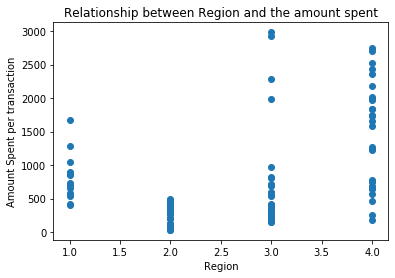

In [21]:
# Let's check the relationship between Region and amount.

# Let's consider 100 random samples.
data_sample = demo_data.sample(100)

# Set x and y axis
x = data_sample['region']
y = data_sample['amount']

# Scatter plot
plt.scatter(x,y, marker='o')
plt.xlabel('Region')
plt.ylabel('Amount Spent per transaction')
plt.title('Relationship between Region and the amount spent')

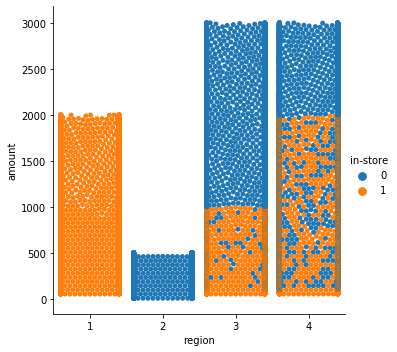

In [54]:
# Scatter plot between Region and Amount using Seaborn


sns.catplot(x="region",y="amount",hue="in-store", data= demo_data, kind='swarm')


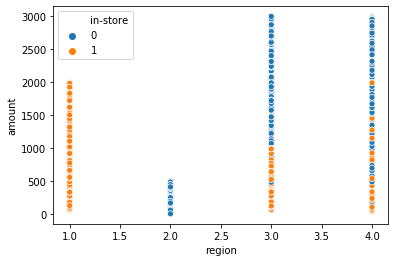

In [49]:
# Another Scatter plot using Seaborn

ax = sns.scatterplot(x="region", y="amount",hue="in-store", data=demo_data)
ax

### Bivariate Analysis using Box plot

Box plots, sometimes called Box and Whisker Plots, are very useful for quickly visualizing where the bulk of the data is in any given feature and are also very useful for identifying feature with outliers or extreme variances in the observations

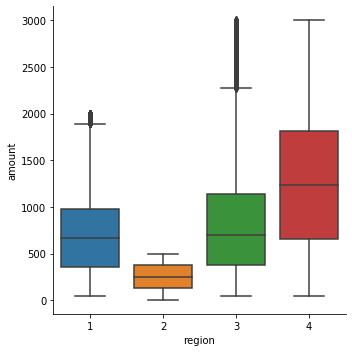

In [25]:
# Check the relationship between region and amount

sns.catplot(x="region", y="amount", kind="box", data=demo_data)

#### Observation: that Region 4's (median)amount per transaction is more. Region 4 spends more per transaction and Region 2 spends less per transaction.

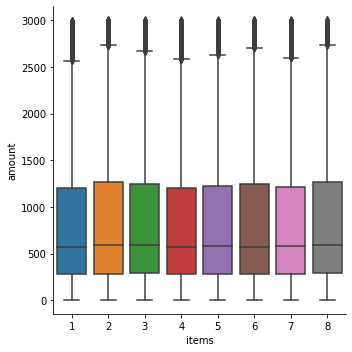

In [26]:
sns.catplot(x="items", y="amount", kind="box", data=demo_data)

### Observation: There seems to be no relation between number of items and the amount spent. The median of almost all items is the same and no significant difference.

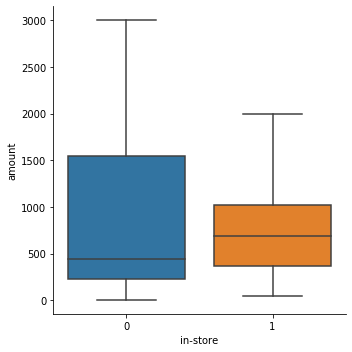

In [27]:
sns.catplot(x="in-store", y="amount", kind="box", data=demo_data)

#### Observation: From the above box plot, can infer that Amount per transaction is  more in online than store.

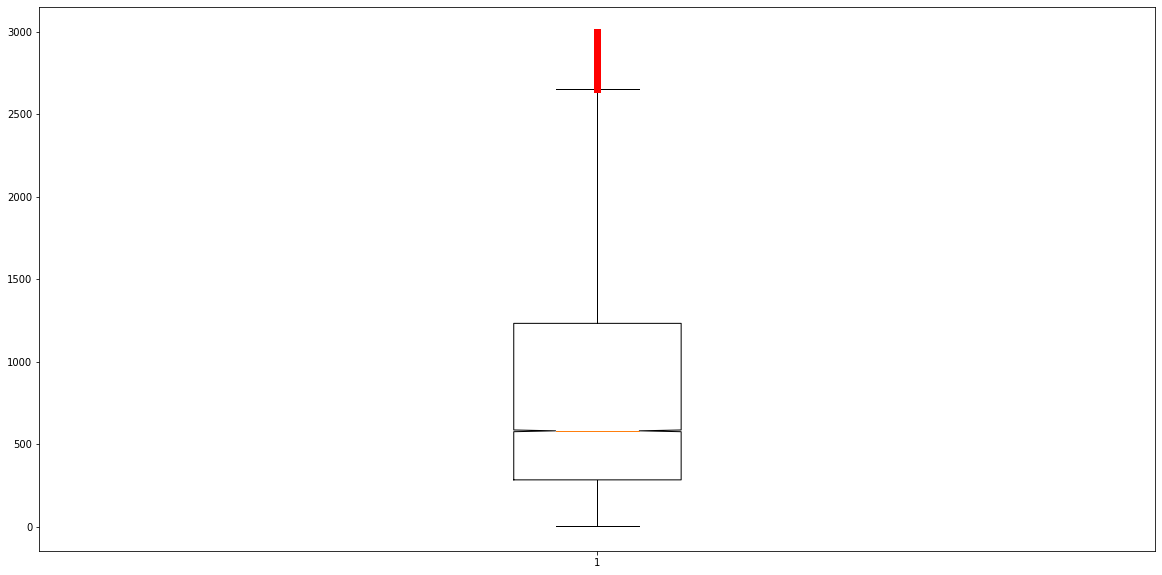

In [28]:
A = demo_data['amount']
plt.figure(figsize=(20,10))
plt.boxplot(A,1,'rs')
plt.show()

###  Multivariate Analysis using Scatterplot matrix

 A pair plot allows us to see both distribution of single variables and relationships between two variables.

C:\Users\PriyaSriram\Anaconda3\envs\DataScience\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\PriyaSriram\Anaconda3\envs\DataScience\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


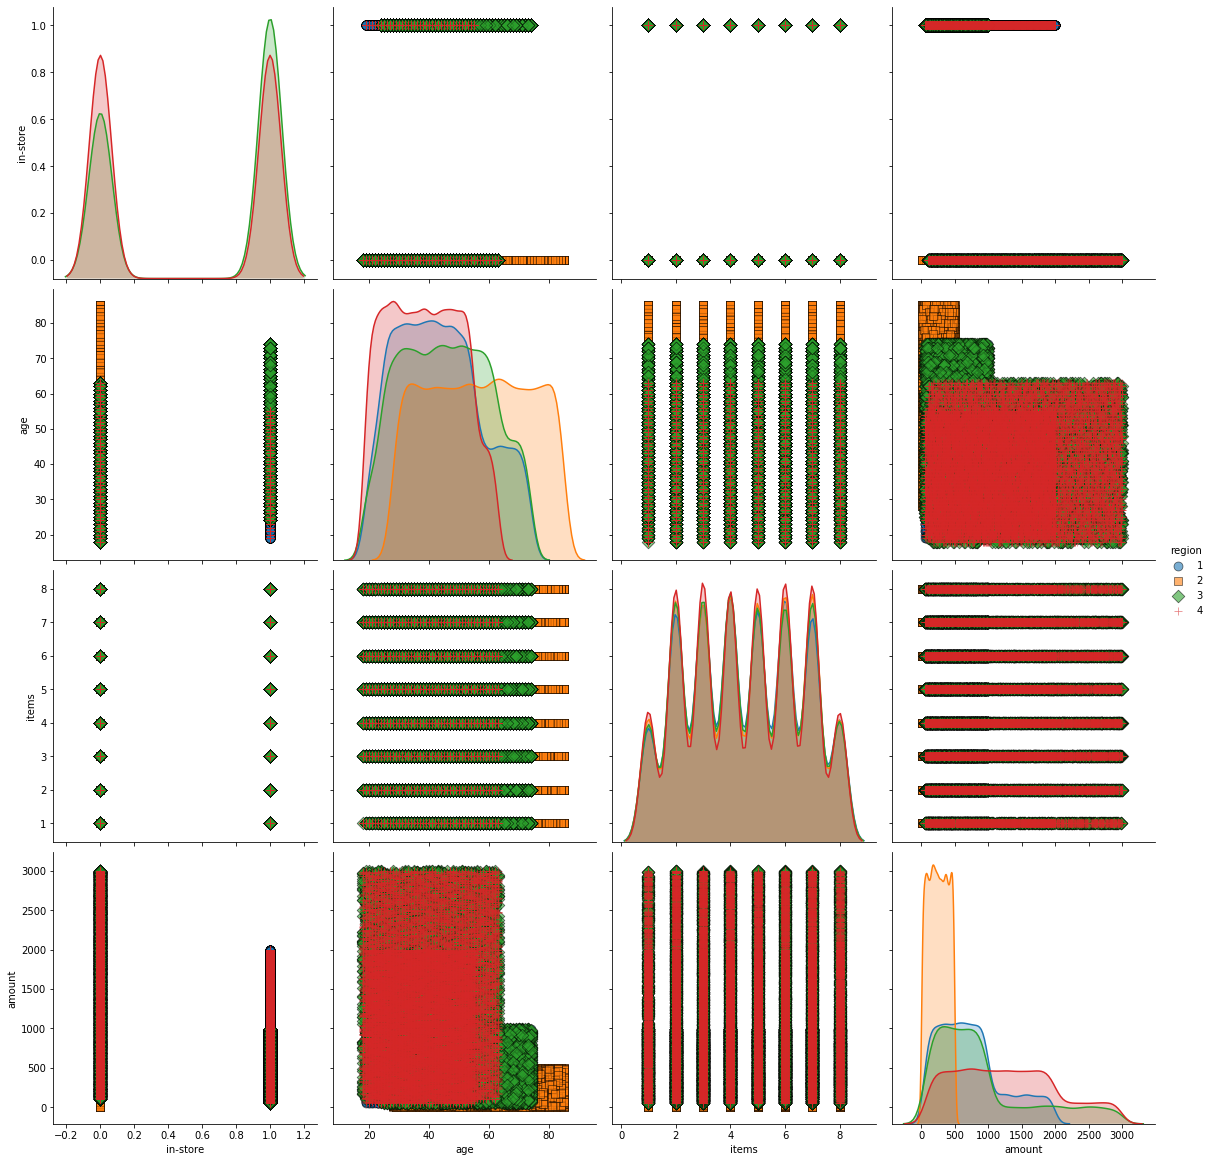

In [29]:
# Let's create a Scatter plot matrix

g=sns.pairplot(demo_data,
               hue='region',
               plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
               markers=["o", "s", "D", "+"],
               height= 4)

# Investigate the relationship between the number of items purchased and amount spent

### Check the relationship between Variables using Statistical methods- Correlation and Covariance Matrix

In [12]:
# Let's check the Correlation

demo_data.corr()

,in-store,age,items,amount,region
in-store,1.000000,-0.178256,-0.003954,-0.085474,-0.133114
age,-0.178256,1.000000,0.000679,-0.282089,-0.235446
items,-0.003954,0.000679,1.000000,0.000367,-0.001925
amount,-0.085474,-0.282089,0.000367,1.000000,0.403504
region,-0.133114,-0.235446,-0.001925,0.403504,1.000000


In [13]:
corrmat=demo_data.corr()

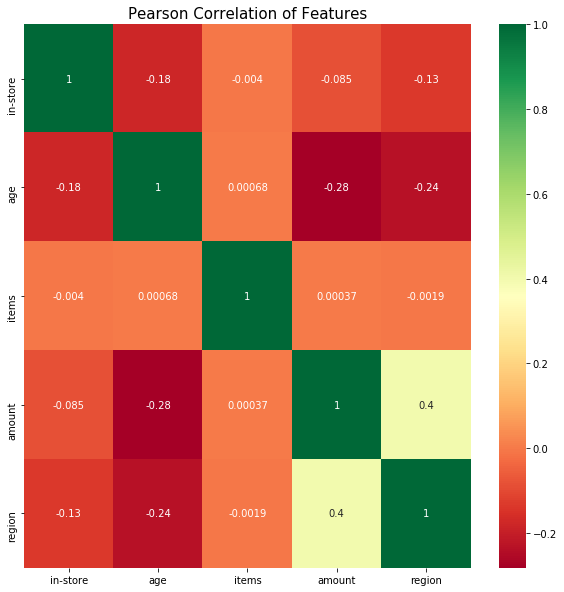

In [14]:
# Visualize the Correlation matrix using Seaborn heatmap


plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size = 15)

g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")


### From the above Correlation matrix, we can infer 

    - Zero Correlation between age of the Customer and the number of items they purchase per transaction
    - Zero Correlation between the number of items per transaction and the total amount of those items
    - No Correlation between the age of the Customer and the mode they use to buy (Online or store)
    - No Correlation between the age of the Customer and the amount they spent
    
    However there seems to be a Strong positive Correlation (0.4) between the region and the amount spent per transaction.

### Observation: Zero Correlation between the number of items and the amount spent

In [33]:
# Let's check the Covariance matrix

demo_data.cov()

,in-store,age,items,amount,region
in-store,0.250003,-1.400718,-0.004075,-30.825404,-0.074988
age,-1.400718,246.982562,0.021980,-3197.566591,-4.168901
items,-0.004075,0.021980,4.248703,0.545629,-0.004471
amount,-30.825404,-3197.566591,0.545629,520235.802331,327.903000
region,-0.074988,-4.168901,-0.004471,327.903000,1.269391


# Data Mining: Investigate the Relationship Between Region and the Amount Spent Per Transaction


### Do customers in different regions spend more per transaction? Which regions spend the most/least?

Let us analyze the data to find the following and thereby answer the above question.


- Sales by region
- Sales by region and mode
- Region with highest sales
- Region with lowest sales
- Avg amount per transaction by Region
- Avg amount per transaction by Region and mode
- Find region with max Avg amount per transaction
- Find region with min Avg amount per transaction


### Sales by Region

In [34]:
# Display numbers in floating point

pd.options.display.float_format = '{:.2f}'.format

In [35]:
# Calculate Sales group by region

SalesByRegion = demo_data.groupby('region').agg(Total_Sales = ('amount', 'sum'))
SalesByRegion

,Total_Sales
region,
1,11922583.85
2,5042183.92
3,16523453.47
4,33385352.32


Text(0.5, 1.0, 'Sales by Region')

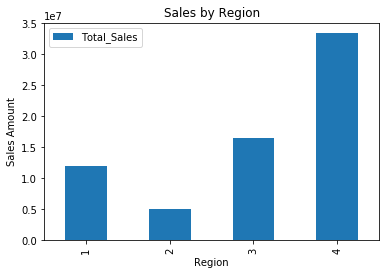

In [36]:
# Visualizing the result

SalesByRegion.plot(kind='bar')

# Add x and y labels
plt.xlabel("Region")
plt.ylabel("Sales Amount")
plt.title ("Sales by Region")

*Observation:Region 4 has the highest Sales*

### Sales by Region and Mode

In [37]:
# Calculate Sales by Region and mode of Transaction (Online or stores)

SalesByRegionMode = demo_data.groupby(['in-store','region']).agg(Total_sales = ('amount','sum'))
SalesByRegionMode

Total_sales
in-store region             
0        2        5042183.92
         3       10793540.39
         4       20067063.98
1        1       11922583.85
         3        5729913.08
         4       13318288.34

In [38]:
# Let's make it Pivot table to understand better

demo_data.pivot_table(values= 'amount',index = 'in-store',columns = 'region',aggfunc = sum,margins = True)


region,1,2,3,4,All
in-store,,,,,
0,nan,5042183.92,10793540.39,20067063.98,35902788.29
1,11922583.85,nan,5729913.08,13318288.34,30970785.28
All,11922583.85,5042183.92,16523453.47,33385352.32,66873573.57


Text(0.5, 1.0, 'Sales by Region and Mode')

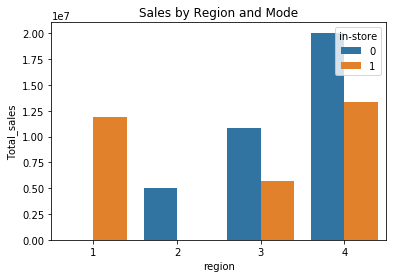

In [39]:
# Plot the result using Seaborn barplot

SalesByRegionMode.reset_index(inplace=True)
sns.barplot(x='region', y='Total_sales',hue='in-store', data=SalesByRegionMode)

plt.title("Sales by Region and Mode")

*Observation: Region 4 has the highest Sales and Online is more than store. Region 2 has the least sales*

### Region with Highest sales

In [40]:
RegionHighestSales = SalesByRegion.sort_values(by = 'Total_Sales', ascending = False).nlargest(1,'Total_Sales')
RegionHighestSales

,Total_Sales
region,
4,33385352.32


### Region with Lowest Sales

In [41]:
RegionHighestSales = SalesByRegion.sort_values(by = 'Total_Sales', ascending=True).nsmallest(1,'Total_Sales')
RegionHighestSales

,Total_Sales
region,
2,5042183.92


### Average Amount per Transaction by Region

In [42]:
# To find the Avg amount per transaction, group by region, find sum of Sales and
# then dividing by total number of transactions.


AvgAmtPerTransByRegion = demo_data.groupby('region').agg(Total_Sales = ('amount','sum'),
                                                         Total_Transactions = ('region','count'))

# Calculate derived attribute
AvgAmtPerTransByRegion['Avg_amount_per_transaction'] = AvgAmtPerTransByRegion['Total_Sales'] / AvgAmtPerTransByRegion['Total_Transactions']

AvgAmtPerTransByRegion

,Total_Sales,Total_Transactions,Avg_amount_per_transaction
region,,,
1,11922583.85,16000,745.16
2,5042183.92,20000,252.11
3,16523453.47,18000,917.97
4,33385352.32,26000,1284.05


Text(0.5, 1.0, 'Avg amount per Transaction by Region')

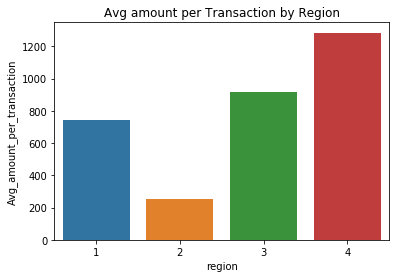

In [43]:
# Visualize the above 

AvgAmtPerTransByRegion.reset_index(inplace = True)    # So that we can plot barplot                                                                                                                                                                                                                         

# Create bar graph
sns.barplot(x='region', y='Avg_amount_per_transaction', data=AvgAmtPerTransByRegion)

# Add title to the plot
plt.title("Avg amount per Transaction by Region")


#### If we consider both Online and Store sales,

  #### -Customers of Region 4 Spend more per transaction 
  #### -Customers of Region 2 Spend less per transaction 

### AVERAGE TRANSACTION AMOUNT FOR EACH REGION

In [44]:
# To find the Avg amount per transaction by Region and mode, group by region and mode, find sum of Sales and
# then dividing by total number of transactions.
AvgAmtPerTransByRegionMode = demo_data.groupby(['in-store','region']).agg(Total_Sales = ('amount','sum'),
                                                                          Total_Transactions = ('region','count'))

# Calculate derived attribute
AvgAmtPerTransByRegionMode['Avg_amount_per_transaction'] = AvgAmtPerTransByRegionMode['Total_Sales'] / AvgAmtPerTransByRegionMode['Total_Transactions']

AvgAmtPerTransByRegionMode

Total_Sales  Total_Transactions  Avg_amount_per_transaction
in-store region                                                             
0        2        5042183.92               20000                      252.11
         3       10793540.39                7001                     1541.71
         4       20067063.98               12999                     1543.74
1        1       11922583.85               16000                      745.16
         3        5729913.08               10999                      520.95
         4       13318288.34               13001                     1024.40

In [45]:
# Converting to Pivot table to understand easily

AvgAmtPerTransByRegionMode.pivot_table(index ='region', columns= 'in-store', values=['Avg_amount_per_transaction'])


Avg_amount_per_transaction        
in-store                          0       1
region                                     
1                               nan  745.16
2                            252.11     nan
3                           1541.71  520.95
4                           1543.74 1024.40

Text(0.5, 1.0, 'Avg amount per Transaction by Region and Mode')

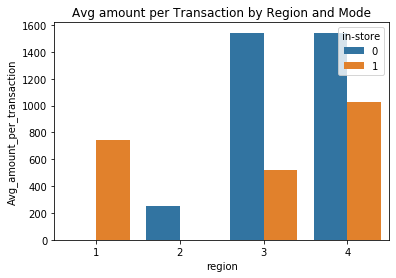

In [46]:
# Visualizing the above

AvgAmtPerTransByRegionMode.reset_index(inplace = True)    # So that we can plot barplot                                                                                                                                                                                                                         

# Create bar graph
sns.barplot(x='region', y='Avg_amount_per_transaction', hue='in-store', data=AvgAmtPerTransByRegionMode)

# Add title to the plot
plt.title("Avg amount per Transaction by Region and Mode")

## Observation: 

#### Region 4 spends more per transaction both online and in store
#### Region 3 Spends almost same as region 4 in Online
#### Region 1 and 2 has to work on Online marketing


# Plotting Sales data

In [6]:

# Total sales by Region, sum(amount) group by Region
Total_Sales = demo_data.sort_values('region', ascending=True).groupby('region').agg(Total_Sales = ('amount','sum'))
   
# Online Sales by Region, filter rows with in-store==0 which means online and then  sum(amount) group by Region
Online_Sales = demo_data[demo_data['in-store']==0].sort_values('region').groupby('region').agg(Online_Sales = ('amount','sum'))

# Store Sales by Region,filter rows with in-store==1 which means store and then  sum(amount) group by Region
Store_Sales = demo_data[demo_data['in-store']==1].sort_values('region').groupby('region').agg(Store_Sales=('amount','sum'))


# Join all 3 Series on index
temp = Total_Sales.join (Online_Sales)
Sales_data = temp.join (Store_Sales)


# Fill null values with 0
Sales_data['Online_Sales'] = Sales_data.groupby('region')['Online_Sales'].transform(lambda x: x.fillna(0))
Sales_data['Store_Sales'] = Sales_data.groupby('region')['Store_Sales'].transform(lambda x: x.fillna(0))


# Display Sales data
Sales_data




,Total_Sales,Online_Sales,Store_Sales
region,,,
1,1.192258e+07,0.000000e+00,1.192258e+07
2,5.042184e+06,5.042184e+06,0.000000e+00
3,1.652345e+07,1.079354e+07,5.729913e+06
4,3.338535e+07,2.006706e+07,1.331829e+07


Text(0.5, 1.0, 'Sales data by Region')

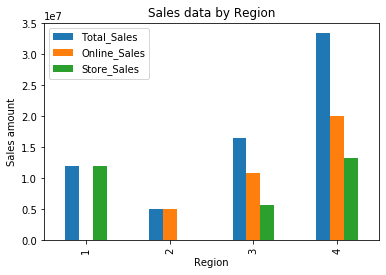

In [48]:
# Visualize the above data

Sales_data.plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Sales amount")
plt.title ("Sales data by Region")


# Summary:

    

### Almost half the sales of the company is from Region 4 and out of which, 60% are from Online Sales 
### Region 3 is the second highest contributor to Total Sales, and out of which 65% are from Online Sale.
### Number of Online transactions is high in Region 2 but the amount spent per transaction is low and hence the total sales in Region 2 is the least
### There are no Online sales at all in Region 1
### In order to continue to maximize the amount of revenue we generate from eCommerce sales, we have to concentrate on Region 1 and 2 more.